# Name: Rawan Mohamed Said
# ID: 4

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn

## Data Loading

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


## Data Normalization

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Data Visualization

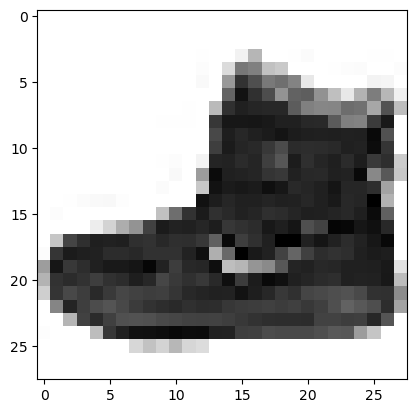

This is an image for:  9


In [5]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()
print("This is an image for: ", train_labels[0])

In [6]:
unique_labels = np.unique(train_labels)
print('Unique Labels: ', unique_labels)

Unique Labels:  [0 1 2 3 4 5 6 7 8 9]


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    print(f'Label {i} corresponds to class: {class_names[i]}')

Label 0 corresponds to class: T-shirt/top
Label 1 corresponds to class: Trouser
Label 2 corresponds to class: Pullover
Label 3 corresponds to class: Dress
Label 4 corresponds to class: Coat
Label 5 corresponds to class: Sandal
Label 6 corresponds to class: Shirt
Label 7 corresponds to class: Sneaker
Label 8 corresponds to class: Bag
Label 9 corresponds to class: Ankle boot


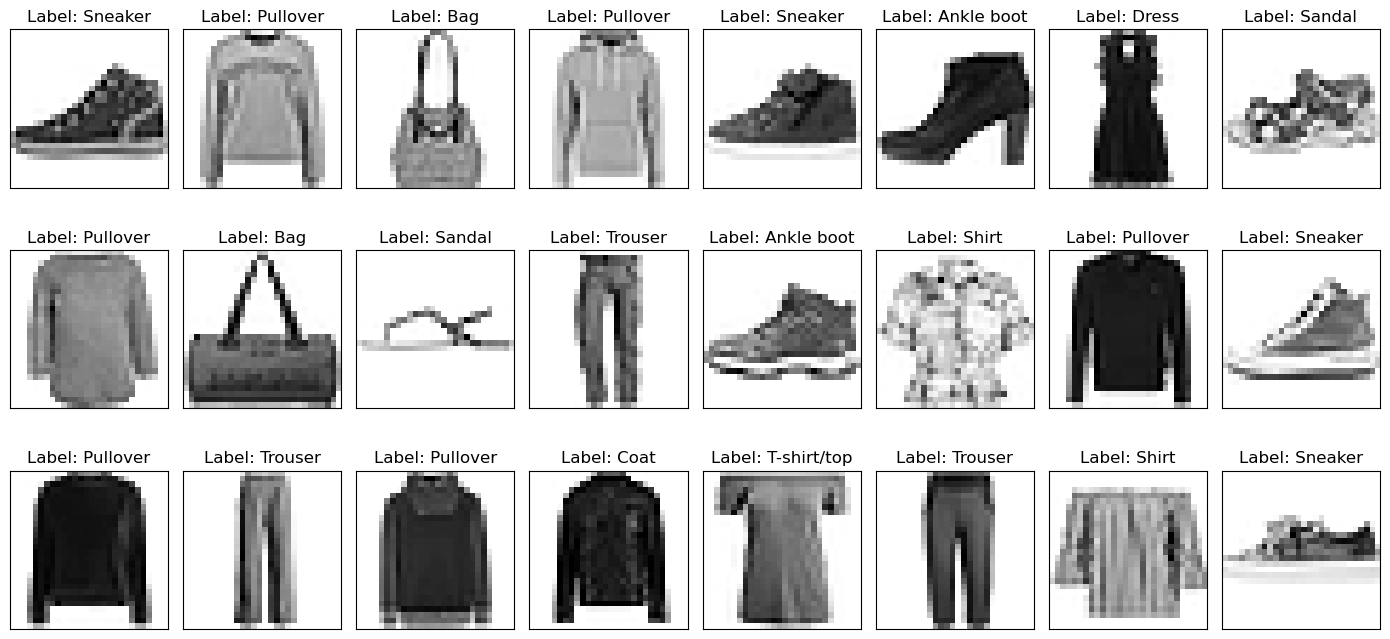

In [8]:
num_images = 10
fig, axes = plt.subplots(3, 8, figsize=(14, 7))

# Display each image
for i in range(3):
    for j in range(8):
        l=rn.randint(0,len(train_images))
        ax = axes[i, j]
        ax.imshow(train_images[l], cmap=plt.cm.binary)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Label: {class_names[train_labels[l]]}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Neural Network Model

In [9]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7732 - loss: 0.6398
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8629 - loss: 0.3731
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8778 - loss: 0.3336
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8865 - loss: 0.3061
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8919 - loss: 0.2881
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8947 - loss: 0.2781
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8989 - loss: 0.2682
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9073 - loss: 0.2513
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9084 - loss: 0.2426
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9097 - loss: 0.2366
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9130 - loss: 0.2270
Epoch 12/40
1875/1875 ━━━━━━━━

## Model Evaluation

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - 1ms/step - accuracy: 0.8904 - loss: 0.4829

Test accuracy: 0.8903999924659729


In [13]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


Predicted label: 9
True label: 9


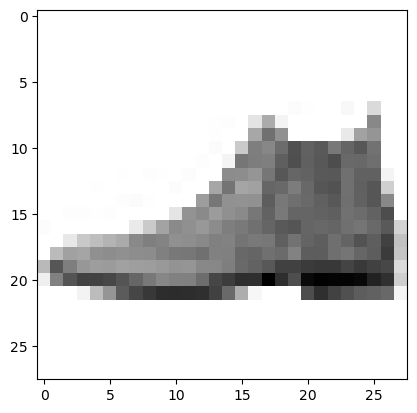

In [14]:
print(f'Predicted label: {predictions[0].argmax()}')
print(f'True label: {test_labels[0]}')
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(predictions, axis=1)

index_names = [f"True: {name}" for name in class_names]
column_names = [f"Predicted: {name}" for name in class_names]

cm = confusion_matrix(test_labels, predicted_labels)
cm_df = pd.DataFrame(cm, index=index_names, columns=column_names)
cm_df

,Predicted: T-shirt/top,Predicted: Trouser,Predicted: Pullover,Predicted: Dress,Predicted: Coat,Predicted: Sandal,Predicted: Shirt,Predicted: Sneaker,Predicted: Bag,Predicted: Ankle boot
True: T-shirt/top,876,2,13,27,3,0,73,0,6,0
True: Trouser,4,974,1,14,5,0,2,0,0,0
True: Pullover,19,2,757,19,110,0,92,0,1,0
True: Dress,18,8,6,919,32,0,13,0,4,0
True: Coat,2,0,48,34,843,0,72,0,1,0
True: Sandal,0,0,0,0,0,977,0,7,3,13
True: Shirt,145,1,58,50,59,0,676,0,11,0
True: Sneaker,0,0,0,0,0,27,0,946,1,26
True: Bag,3,0,2,5,2,3,4,3,978,0
True: Ankle boot,0,0,0,0,0,10,1,31,0,958


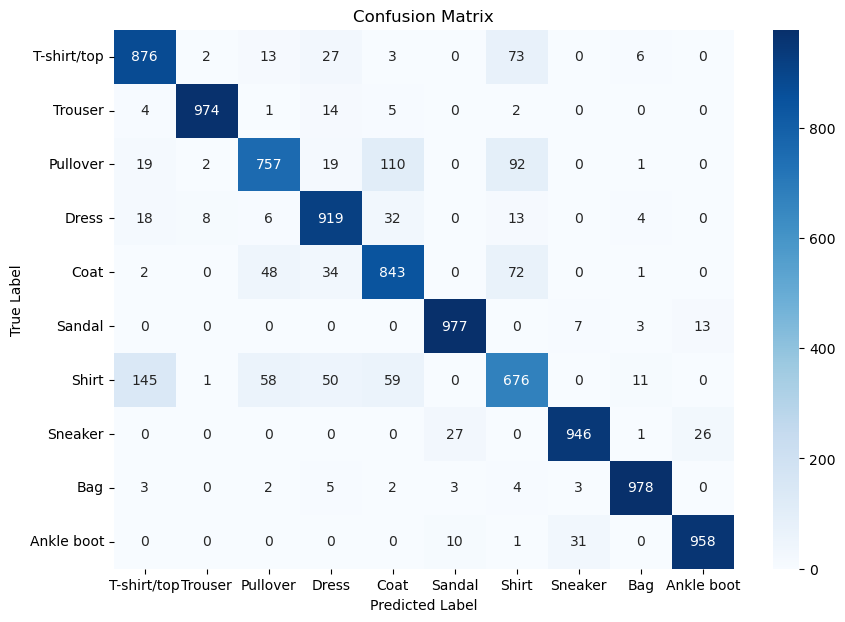

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions

print(f"Number of correct predictions: {correct_predictions}")
print(f"Number of incorrect predictions: {incorrect_predictions}")

Number of correct predictions: 8904
Number of incorrect predictions: 1096
